### HW 1-4

텍스트북의 3.4 (3.4_Binary_Classification_classifying-movie-reviews) 예제에서
<br/> 1) We are using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
<br/> 2) Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
<br/> 3) Try to use the`mse` loss function instead of `binary_crossentropy`.
<br/> 4) Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

#### 1. importing data

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

#### 2. preparing data (list to tensor)

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2. building network

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

#### 3. setting optimizers

In [9]:
from keras import optimizers

network.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### 4. validation

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 5. model (network) training

In [11]:
history = network.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 361us/step - loss: 0.5397 - accuracy: 0.7690 - val_loss: 0.4165 - val_accuracy: 0.8729
Epoch 2/20
15000/15000 [==============================] - 5s 300us/step - loss: 0.3283 - accuracy: 0.9017 - val_loss: 0.3165 - val_accuracy: 0.8849
Epoch 3/20
15000/15000 [==============================] - 5s 305us/step - loss: 0.2343 - accuracy: 0.9250 - val_loss: 0.2943 - val_accuracy: 0.8838
Epoch 4/20
15000/15000 [==============================] - 5s 358us/step - loss: 0.1849 - accuracy: 0.9402 - val_loss: 0.2739 - val_accuracy: 0.8909
Epoch 5/20
15000/15000 [==============================] - 6s 395us/step - loss: 0.1479 - accuracy: 0.9548 - val_loss: 0.2767 - val_accuracy: 0.8898
Epoch 6/20
15000/15000 [==============================] - 5s 336us/step - loss: 0.1252 - accuracy: 0.9623 - val_loss: 0.2943 - val_accuracy: 0.8856
Epoch 7/20
15000/15000 [==============================] - 5s 

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

#### 6. plotting training and validation loss

In [13]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'royalblue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

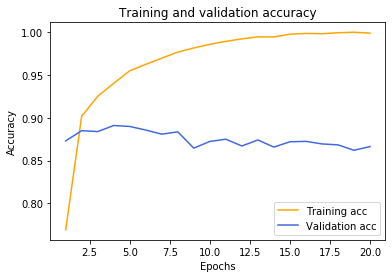

In [14]:
plt.clf() # clear figure

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'royalblue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 7. results

In [15]:
results = network.evaluate(x_test, y_test)

25000/25000 [==============================] - 23s 920us/step


In [16]:
results

[0.7646374287462234, 0.8511999845504761]